In [1]:
from google.colab import files
per_capita_income=files.upload()

Saving canada_per_capita_income.csv to canada_per_capita_income.csv


In [2]:
from google.colab import files
salary=files.upload()

Saving salary.csv to salary.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn import linear_model

In [4]:
df1=pd.read_csv("canada_per_capita_income.csv")
df1.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
df2=pd.read_csv("salary.csv")
df2.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
df1.isnull().sum()

,0
year,0
per capita income (US$),0


In [7]:
df2.isnull().sum()

,0
YearsExperience,2
Salary,0


In [8]:
df2.YearsExperience.median()


4.5

In [9]:
df2.YearsExperience = df2.YearsExperience.fillna(df2.YearsExperience.median())
df2

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


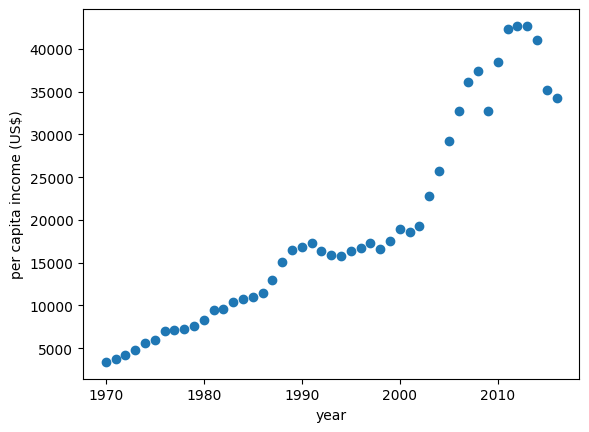

In [42]:
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.scatter(df1.year, df1['per capita income (US$)'])

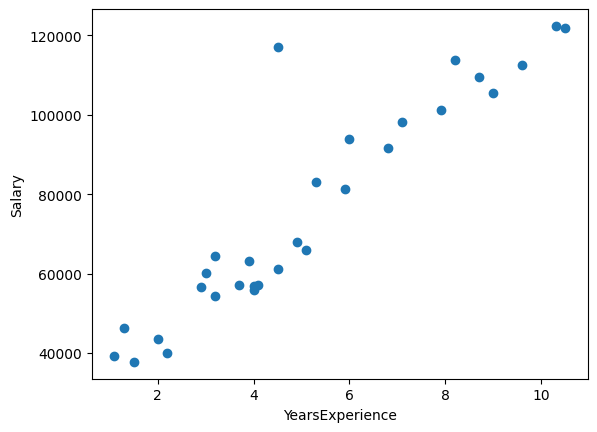

In [43]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(df2.YearsExperience, df2.Salary)

In [15]:
reg1 = linear_model.LinearRegression()
reg1.fit(df1.drop('per capita income (US$)', axis='columns'), df1['per capita income (US$)'])

LinearRegression()

In [16]:
reg1.coef_

array([828.46507522])

In [17]:
reg1.intercept_

-1632210.7578554575

In [18]:
reg1.predict([[2020]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [19]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2.drop('Salary', axis='columns'), df2['Salary'])

LinearRegression()

In [20]:
reg2.coef_

array([9275.93010112])

In [21]:
reg2.intercept_

28262.879746248997

In [22]:
reg2.predict([[12]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139574.04095966])

In [23]:
from google.colab import files
hiring=files.upload()

Saving hiring.csv to hiring.csv


In [24]:
from google.colab import files
companies=files.upload()

Saving 1000_Companies.csv to 1000_Companies.csv


In [25]:
df3=pd.read_csv("hiring.csv")
df3.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [26]:
df4=pd.read_csv("1000_Companies.csv")
df4.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [27]:
df3.isnull().sum()

,0
experience,2
test_score(out of 10),1
interview_score(out of 10),0
salary($),0


In [28]:
df4.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [29]:
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [30]:
df3_copy = df3.copy()

experience_mapping = {'two': 2, 'three': 3, 'five': 5, 'seven': 7, 'ten': 10, 'eleven': 11}
df3_copy['experience'] = df3_copy['experience'].map(experience_mapping)

median_experience = df3_copy['experience'].median()
df3_copy['experience'] = df3_copy['experience'].fillna(median_experience)

df3_copy

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [31]:
df3_copy['test_score(out of 10)'] = df3_copy['test_score(out of 10)'].fillna(df3_copy['test_score(out of 10)'].mean())

In [32]:
reg3 = linear_model.LinearRegression()
reg3.fit(df3_copy.drop('salary($)', axis='columns'), df3_copy['salary($)'])


LinearRegression()

In [33]:
reg3.coef_

array([2823.76559304, 1329.00027432, 2929.14459978])

In [34]:
reg3.intercept_

11842.306307731225

In [35]:
reg3.predict([[2,9,6]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47025.70756135])

In [36]:
reg3.predict([[12,10,10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88308.94216519])

In [37]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
state_encoded = ohe.fit_transform(df4[['State']])
state_encoded_df = pd.DataFrame(state_encoded, columns=ohe.get_feature_names_out(['State']))
df4 = pd.concat([df4, state_encoded_df], axis=1).drop(columns=['State'])
print(df4)

     R&D Spend  Administration  Marketing Spend        Profit  \
0    165349.20      136897.800      471784.1000  192261.83000   
1    162597.70      151377.590      443898.5300  191792.06000   
2    153441.51      101145.550      407934.5400  191050.39000   
3    144372.41      118671.850      383199.6200  182901.99000   
4    142107.34       91391.770      366168.4200  166187.94000   
..         ...             ...              ...           ...   
995   54135.00      118451.999      173232.6695   95279.96251   
996  134970.00      130390.080      329204.0228  164336.60550   
997  100275.47      241926.310      227142.8200  413956.48000   
998  128456.23      321652.140      281692.3200  333962.19000   
999  161181.72      270939.860      295442.1700  476485.43000   

     State_California  State_Florida  State_New York  
0                 0.0            0.0             1.0  
1                 1.0            0.0             0.0  
2                 0.0            1.0             0.0  

In [38]:
reg4 = linear_model.LinearRegression()
reg4.fit(df4.drop('Profit',axis='columns'),df4.Profit)
print(reg4.coef_)
print(reg4.intercept_)


[ 5.53149346e-01  1.02624663e+00  8.10861610e-02  1.16208642e+02
 -3.30144893e+02  2.13936251e+02]
-70167.45814579468


In [39]:
reg4.predict([[91694.48, 515841.3, 11931.24,0,1,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([510570.99261083])